# Loading the Dataset

In [2]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pathlib import Path

# Load DataFrame from file_path
## Cancer rates data are taken from: https://science.sciencemag.org/content/371/6535/1245?utm_campaign=toc_sci-mag_2021-03-18&et_rid=681382821&et_cid=3704890
data_folder = Path('./data/')
file = data_folder / 'Data.Log10LifetimeRisk.Log10TotaStemCellDivisions.txt'
cancer_sc_df = pd.read_csv(file, sep='\t', names=['Tissue', 'Log10LifetimeRisk', 'Log10TotaStemCellDivisions'], na_values='-')

# Identifying some variables for future use
LogRisk = cancer_sc_df['Log10LifetimeRisk']
LogStem = cancer_sc_df['Log10TotaStemCellDivisions']

# Removing NaN values from the dataset
cancer_sc_df = cancer_sc_df.dropna()
cancer_sc_df

,Tissue,Log10LifetimeRisk,Log10TotaStemCellDivisions
4,Appendicular_Skeleton_Forelimbs,-4.397940,6.658011
5,Appendicular_Skeleton_Hindlimbs,-3.657577,7.046495
6,Appendicular_Skeleton_Pelvis,-4.522879,6.498311
11,Brain_Hind,-3.958607,8.434569
12,Brain_Mid_and_Fore,-2.659556,8.431364
16,Colorectal_Glands,-1.318759,12.067443
21,Dermis,-0.522879,12.550228
22,Duodenal_Glands,-3.522879,9.891872
26,Epidermis,-1.692504,11.882980
29,Esophageal_Epithelium,-2.712646,9.080266


# Why the Analyses Will Be Done On Log Transformed Data

### Histograms of the Non-Log Transformed Data

(array([27.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([1.52760081e-03, 3.58219687e+05, 7.16439372e+05, 1.07465906e+06,
        1.43287874e+06, 1.79109843e+06, 2.14931811e+06, 2.50753780e+06,
        2.86575748e+06, 3.22397717e+06, 3.58219685e+06]),
 <BarContainer object of 10 artists>)

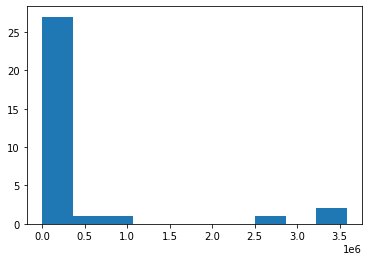

In [76]:
# Reversing the log transformation for lifetime risk
RegRisk = np.power(LogRisk,10)
plt.hist(RegRisk)

(array([14.,  2.,  1.,  1.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([1.34277926e+08, 9.81514618e+09, 1.94960144e+10, 2.91768827e+10,
        3.88577510e+10, 4.85386192e+10, 5.82194875e+10, 6.79003557e+10,
        7.75812240e+10, 8.72620922e+10, 9.69429605e+10]),
 <BarContainer object of 10 artists>)

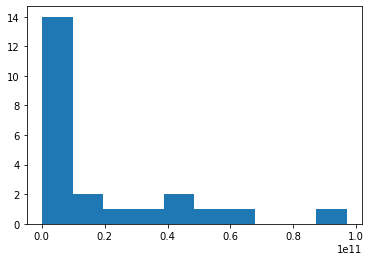

In [77]:
# Reversing the Log transformation for stem cells
RegStem = np.power(LogStem,10)
plt.hist(RegStem)

As shown by both histograms, the non-log transformed data is incredibly skewed

### Histograms of the Log Transformed Data

Both log transformed histograms, in the same cell
       Log10LifetimeRisk  Log10TotaStemCellDivisions
count          23.000000                   23.000000
mean           -2.721660                    9.441104
std             1.071136                    1.930491
min            -4.522879                    6.498311
25%            -3.506167                    7.830736
50%            -2.552842                    9.524785
75%            -1.924754                   11.273209
max            -0.522879                   12.550228


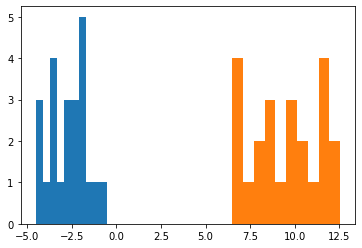

In [78]:
# Both Histograms while log transformed
print('Both log transformed histograms, in the same cell')
plt.hist(cancer_sc_df['Log10LifetimeRisk'])
plt.hist(cancer_sc_df['Log10TotaStemCellDivisions'])
print(cancer_sc_df.describe())

By comparison, the log-transformed data much more closely resembles a bell-curve. As such, the analyses will be performed using the log-transformed data

# Correlation Test

### Regression Model

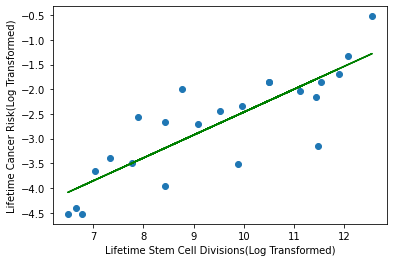

This linear regression model has a coefficient of determination value of 0.6995519607987079
slope: [[0.46407323]]


In [24]:
# Creating a linear regression model to look for correlations
from sklearn import linear_model

x = cancer_sc_df[['Log10TotaStemCellDivisions']]
y = cancer_sc_df[['Log10LifetimeRisk']]

linear = linear_model.LinearRegression()
linear.fit(x, y)

y_pred = linear.predict(x)

# This 1st line is just for the color of the line :) 
plt.plot(x, y_pred, color='green')
plt.scatter(x, y)
plt.xlabel('Lifetime Stem Cell Divisions(Log Transformed)')
plt.ylabel('Lifetime Cancer Risk(Log Transformed)')
plt.show()

# R^2 value of linear regression model
print('This linear regression model has a coefficient of determination value of {0}'.format(linear.score(x, y)))

# Slope of model
print('slope:', linear.coef_)

### Pearson's Correlation Coefficient & P-Value

In [8]:
# Converting DataFrame to NumPy Arrays
xarray = cancer_sc_df['Log10TotaStemCellDivisions'].to_numpy()
yarray = cancer_sc_df['Log10LifetimeRisk'].to_numpy()

# Calculating R-value and P-value
stats.pearsonr(xarray, yarray)

(0.8363922290401244, 6.638030189718123e-07)

The left value is Pearson's correlation coefficient and the right value is the p-value.

As can be seen, the he high correlation coefficient strongly suggests a linear, direct correlation. p-value is below 0.05, and so the null-hypothesis is rejected. The high correlation coefficient strongly suggests a linear, direct correlation. 